<a href="https://colab.research.google.com/github/sashachereshnya-pixel/compling2025/blob/main/%D0%A7%D0%95%D0%A0%D0%95%D0%92%D0%98%D0%9A_%D0%94%D0%97_w2v_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В этом практикуме мы рассмотрим работу с библиотекой **Gensim** для работы с векторными представлениями текста

Мы рассмотрим
- **Word2Vec** - векторные представления слов
- **FastText** - улучшенные представления с учетом морфологии  
- **Doc2Vec** - векторные представления документов


In [8]:
!pip install gensim

import gensim
import gensim.downloader as api
from gensim.models import Word2Vec, FastText, Doc2Vec
from gensim.models.doc2vec import TaggedDocument
import numpy as np

## Часть 1: Word2Vec

### Что такое Word2Vec?

Word2Vec преобразует слова в векторы чисел так, что семантически похожие слова оказываются близко в векторном пространстве.

**Два основных алгоритма:**
- **CBOW** - предсказывает слово по контексту
- **Skip-gram** - предсказывает контекст по слову

**Загрузка предобученной модели**

In [9]:
w2v_model = api.load('glove-wiki-gigaword-100')

print(f"Размер словаря: {len(w2v_model.key_to_index)}")
print(f"Размерность векторов: {w2v_model.vector_size}")

Размер словаря: 400000
Размерность векторов: 100


Найдите документацию `gensim`: какие датасеты кроме `glove-wiki-gigaword-100` доступны в библиотеке?

Выберите 3 датасета и кратко опишите их (источник данных, примерный объем, зачем такой датасет может использоваться)

In [11]:
import gensim.downloader as api

# Получить список всех доступных моделей
print("Доступные модели в Gensim:")
for model_name in api.info()['models'].keys():
    print(f"- {model_name}")

Доступные модели в Gensim:
- fasttext-wiki-news-subwords-300
- conceptnet-numberbatch-17-06-300
- word2vec-ruscorpora-300
- word2vec-google-news-300
- glove-wiki-gigaword-50
- glove-wiki-gigaword-100
- glove-wiki-gigaword-200
- glove-wiki-gigaword-300
- glove-twitter-25
- glove-twitter-50
- glove-twitter-100
- glove-twitter-200
- __testing_word2vec-matrix-synopsis


1. word2vec-google-news-300
Источник: Google News (около 100 млрд слов)

Объем: 3 млн слов, 300-мерные векторы

Размер файла: ~1.6 GB

Назначение: Общего назначения, обучен на новостных данных

Использование: Семантический анализ, поиск похожих слов, аналогии


2. glove-twitter-200

Источник: Twitter (2 млрд твитов, 27 млрд токенов)

Объем: 1.2 млн слов, 200-мерные векторы

Размер файла: ~382 MB

Назначение: Анализ социальных медиа и неформального текста

Использование: Анализ твитов, сентимент-анализ, обработка интернет-сленга


3. fasttext-wiki-news-subwords-300

Источник: Wikipedia + News articles (16 млрд токенов)

Объем: 1 млн слов, 300-мерные векторы

Особенность: Поддержка subword information (n-grams)

Назначение: Работа с OOV (out-of-vocabulary) словами

Использование: Морфологический анализ, работа с опечатками, редкими словами

**Базовые операции с векторами**

In [12]:
# Получаем вектор слова
vector = w2v_model['computer']
print(f"Вектор слова 'computer': {vector[:5]}...")  # Показываем первые 5 чисел

# Вычисляем схожесть между словами
similarity = w2v_model.similarity('computer', 'laptop')
print(f"Схожесть 'computer' и 'laptop': {similarity:.4f}")

Вектор слова 'computer': [-0.16298   0.30141   0.57978   0.066548  0.45835 ]...
Схожесть 'computer' и 'laptop': 0.7024


**Поиск похожих слов**

In [13]:
# Находим похожие слова
similar_words = w2v_model.most_similar('python', topn=5)
print("Слова, похожие на 'python':")
for word, score in similar_words:
    print(f"  {word}: {score:.4f}")

Слова, похожие на 'python':
  monty: 0.6886
  php: 0.5865
  perl: 0.5784
  cleese: 0.5447
  flipper: 0.5113


*Ваш ответ здесь*

**Задание**

1. Загрузите любой датасет из gensim на ваш выбор

In [14]:
model = api.load("word2vec-google-news-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


2. Напишите функцию, которая принимает на вход любое слово и вовращает 10 наиболее близких по вектору слов

In [15]:
def find_similar_words(word):
    """
    Находит 10 наиболее близких слов по векторному представлению

    Parameters:
    -----------
    word : str
        Исходное слово для поиска похожих

    Returns:
    --------
    list of tuples
        Список кортежей (слово, косинусная близость)
    """
    try:
        similar_words = model.most_similar(word, topn=10)
        return similar_words
    except KeyError:
        return f"Слово '{word}' не найдено в словаре"

# Примеры использования
print(find_similar_words("king"))
print(find_similar_words("computer"))
print(find_similar_words("paris"))

[('kings', 0.7138045430183411), ('queen', 0.6510956883430481), ('monarch', 0.6413194537162781), ('crown_prince', 0.6204220056533813), ('prince', 0.6159993410110474), ('sultan', 0.5864824056625366), ('ruler', 0.5797567367553711), ('princes', 0.5646552443504333), ('Prince_Paras', 0.5432944297790527), ('throne', 0.5422105193138123)]
[('computers', 0.7979379892349243), ('laptop', 0.6640493273735046), ('laptop_computer', 0.6548868417739868), ('Computer', 0.647333562374115), ('com_puter', 0.6082080006599426), ('technician_Leonard_Luchko', 0.5662748217582703), ('mainframes_minicomputers', 0.5617720484733582), ('laptop_computers', 0.5585449934005737), ('PC', 0.5539618730545044), ('maker_Dell_DELL.O', 0.5519254207611084)]
[('heidi', 0.5592167377471924), ('london', 0.5555775165557861), ('france', 0.5550795793533325), ('dubai', 0.5532331466674805), ('samuel', 0.549419641494751), ('hilton', 0.5472869277000427), ('rome', 0.5465837717056274), ('toronto', 0.5457152724266052), ('las_vegas', 0.54417395

3. Обучите модель Word2Vec на тестовом датасете из ячейки ниже

Примените следующие настройки:

- размер вектора: 50
- размер окна: 3
- минимальная частота слова: 1
- потоков: 2
- использовать skip-gram

In [16]:
cooking_sentences = [
    ['варить', 'суп', 'овощи', 'морковь', 'картофель'],
    ['жарить', 'курица', 'сковорода', 'масло', 'специи'],
    ['печь', 'хлеб', 'мука', 'дрожжи', 'духовка'],
    ['резать', 'овощи', 'салат', 'помидоры', 'огурцы'],
    ['смешивать', 'ингредиенты', 'тесто', 'яйца', 'молоко'],
    ['варить', 'паста', 'вода', 'соль', 'соус'],
    ['гриль', 'мясо', 'овощи', 'уголь', 'барбекю'],
    ['тушить', 'говядина', 'горшок', 'вино', 'травы'],
    ['запекать', 'рыба', 'лимон', 'духовка', 'фольга'],
    ['готовить', 'завтрак', 'яичница', 'бекон', 'тост'],
    ['месить', 'тесто', 'пирог', 'начинка', 'яблоки'],
    ['кипятить', 'вода', 'чай', 'кофе', 'чашка'],
    ['мариновать', 'мясо', 'соус', 'специи', 'холодильник'],
    ['взбивать', 'сливки', 'сахар', 'десерт', 'торт'],
    ['парить', 'овощи', 'здоровое', 'питание', 'брокколи']
]

In [17]:
from gensim.models import Word2Vec

# Тестовый датасет
cooking_sentences = [
    ['варить', 'суп', 'овощи', 'морковь', 'картофель'],
    ['жарить', 'курица', 'сковорода', 'масло', 'специи'],
    ['печь', 'хлеб', 'мука', 'дрожжи', 'духовка'],
    ['резать', 'овощи', 'салат', 'помидоры', 'огурцы'],
    ['смешивать', 'ингредиенты', 'тесто', 'яйца', 'молоко'],
    ['варить', 'паста', 'вода', 'соль', 'соус'],
    ['гриль', 'мясо', 'овощи', 'уголь', 'барбекю'],
    ['тушить', 'говядина', 'горшок', 'вино', 'травы'],
    ['запекать', 'рыба', 'лимон', 'духовка', 'фольга'],
    ['готовить', 'завтрак', 'яичница', 'бекон', 'тост'],
    ['месить', 'тесто', 'пирог', 'начинка', 'яблоки'],
    ['кипятить', 'вода', 'чай', 'кофе', 'чашка'],
    ['мариновать', 'мясо', 'соус', 'специи', 'холодильник'],
    ['взбивать', 'сливки', 'сахар', 'десерт', 'торт'],
    ['парить', 'овощи', 'здоровое', 'питание', 'брокколи']
]

# Обучаем модель с указанными параметрами
model = Word2Vec(
    sentences=cooking_sentences,
    vector_size=50,      # размер вектора
    window=3,            # размер окна
    min_count=1,         # минимальная частота слова
    workers=2,           # потоков
    sg=1                 # использовать skip-gram
)

# Функция для поиска похожих слов
def find_similar_words(word):
    """
    Находит 10 наиболее близких слов по векторному представлению
    """
    try:
        similar_words = model.wv.most_similar(word, topn=10)
        return similar_words
    except KeyError:
        return f"Слово '{word}' не найдено в словаре"

# Тестируем функцию
print("Размер словаря:", len(model.wv.key_to_index))
print("\nПохожие слова для 'варить':")
print(find_similar_words('варить'))
print("\nПохожие слова для 'тесто':")
print(find_similar_words('тесто'))
print("\nПохожие слова для 'овощи':")
print(find_similar_words('овощи'))

Размер словаря: 65

Похожие слова для 'варить':
[('вино', 0.23975302278995514), ('ингредиенты', 0.21724146604537964), ('хлеб', 0.1937645971775055), ('брокколи', 0.18456541001796722), ('кипятить', 0.17112019658088684), ('огурцы', 0.16630668938159943), ('холодильник', 0.16596782207489014), ('тост', 0.14339452981948853), ('тесто', 0.13644389808177948), ('овощи', 0.1319844275712967)]

Похожие слова для 'тесто':
[('жарить', 0.24162565171718597), ('масло', 0.23721089959144592), ('помидоры', 0.2005457580089569), ('тушить', 0.19407659769058228), ('огурцы', 0.16896644234657288), ('соус', 0.16549615561962128), ('травы', 0.16510964930057526), ('сковорода', 0.16029614210128784), ('десерт', 0.15369117259979248), ('кипятить', 0.13820579648017883)]

Похожие слова для 'овощи':
[('мариновать', 0.2715907096862793), ('хлеб', 0.26912084221839905), ('гриль', 0.25464725494384766), ('фольга', 0.24094568192958832), ('сахар', 0.21084155142307281), ('жарить', 0.19675664603710175), ('яблоки', 0.18620814383029938

In [18]:
print(f"Слова в словаре: {list(model.wv.key_to_index.keys())[:10]}...")

Слова в словаре: ['овощи', 'мясо', 'соус', 'вода', 'тесто', 'духовка', 'специи', 'варить', 'брокколи', 'питание']...


4. Проверьте модель

In [19]:
# Проверяем похожие слова в кулинарной тематике
try:
    similar = model.wv.most_similar('варить', topn=5)
    print("Слова, похожие на 'варить':")
    for word, score in similar:
        print(f"  {word}: {score:.4f}")
except KeyError:
    print("Слово 'варить' не найдено в словаре")

Слова, похожие на 'варить':
  вино: 0.2398
  ингредиенты: 0.2172
  хлеб: 0.1938
  брокколи: 0.1846
  кипятить: 0.1711


In [20]:
# Найдите слова, похожие на "духовка"
try:
    similar = model.wv.most_similar('духовка', topn=5)
    print("\nСлова, похожие на 'духовка':")
    for word, score in similar:
        print(f"  {word}: {score:.4f}")
except KeyError:
    print("Слово 'духовка' не найдено в словаре")

# Найдите слова, похожие на "овощи"
try:
    similar = model.wv.most_similar('овощи', topn=5)
    print("\nСлова, похожие на 'овощи':")
    for word, score in similar:
        print(f"  {word}: {score:.4f}")
except KeyError:
    print("Слово 'овощи' не найдено в словаре")


Слова, похожие на 'духовка':
  ингредиенты: 0.3199
  десерт: 0.3064
  холодильник: 0.2705
  питание: 0.2243
  пирог: 0.2142

Слова, похожие на 'овощи':
  мариновать: 0.2716
  хлеб: 0.2691
  гриль: 0.2546
  фольга: 0.2409
  сахар: 0.2108


## Часть 2: FastText

FastText улучшает Word2Vec, рассматривая слова как наборы символов (n-грамм). Это позволяет работать с редкими словами и опечатками

5. Обучите FastText на корпусе текстов из пункта 3. Используйте код ниже

In [23]:
from gensim.models import FastText

# Корпус текстов из пункта 3
cooking_sentences = [
    ['варить', 'суп', 'овощи', 'морковь', 'картофель'],
    ['жарить', 'курица', 'сковорода', 'масло', 'специи'],
    ['печь', 'хлеб', 'мука', 'дрожжи', 'духовка'],
    ['резать', 'овощи', 'салат', 'помидоры', 'огурцы'],
    ['смешивать', 'ингредиенты', 'тесто', 'яйца', 'молоко'],
    ['варить', 'паста', 'вода', 'соль', 'соус'],
    ['гриль', 'мясо', 'овощи', 'уголь', 'барбекю'],
    ['тушить', 'говядина', 'горшок', 'вино', 'травы'],
    ['запекать', 'рыба', 'лимон', 'духовка', 'фольга'],
    ['готовить', 'завтрак', 'яичница', 'бекон', 'тост'],
    ['месить', 'тесто', 'пирог', 'начинка', 'яблоки'],
    ['кипятить', 'вода', 'чай', 'кофе', 'чашка'],
    ['мариновать', 'мясо', 'соус', 'специи', 'холодильник'],
    ['взбивать', 'сливки', 'сахар', 'десерт', 'торт'],
    ['парить', 'овощи', 'здоровое', 'питание', 'брокколи']
]

# Обучаем модель FastText
ft_model = FastText(
    sentences=cooking_sentences,
    vector_size=50,
    window=3,
    min_count=1,
    workers=2
)

print("Модель FastText успешно обучена!")
print(f"Размер словаря: {len(ft_model.wv.key_to_index)}")

# Проверим работу модели на примерах
print("\nПроверка модели FastText:")

# Похожие слова
try:
    similar = ft_model.wv.most_similar('варить', topn=3)
    print("Слова, похожие на 'варить':")
    for word, score in similar:
        print(f"  {word}: {score:.4f}")
except KeyError:
    print("Слово 'варить' не найдено")

# Одно из преимуществ FastText - работа с OOV (out-of-vocabulary) словами
# Проверим на словах, которых нет в обучающей выборке, но которые похожи на существующие
print("\nПроверка OOV слов (слов, которых нет в обучающей выборке):")

# Примеры слов, которых нет в оригинальном датасете
oov_words = ['вариться', 'зажарить', 'печенье', 'нарезать', 'смешать']

for word in oov_words:
    try:
        similar = ft_model.wv.most_similar(word, topn=3)
        print(f"Слова, похожие на '{word}':")
        for similar_word, score in similar:
            print(f"  {similar_word}: {score:.4f}")
    except Exception as e:
        print(f"Ошибка для слова '{word}': {e}")

Модель FastText успешно обучена!
Размер словаря: 65

Проверка модели FastText:
Слова, похожие на 'варить':
  жарить: 0.5353
  парить: 0.4805
  месить: 0.3541

Проверка OOV слов (слов, которых нет в обучающей выборке):
Слова, похожие на 'вариться':
  варить: 0.6638
  тушить: 0.2911
  смешивать: 0.2860
Слова, похожие на 'зажарить':
  жарить: 0.5890
  варить: 0.5632
  парить: 0.4100
Слова, похожие на 'печенье':
  фольга: 0.3484
  паста: 0.2873
  вода: 0.2437
Слова, похожие на 'нарезать':
  резать: 0.6994
  кипятить: 0.3611
  завтрак: 0.3302
Слова, похожие на 'смешать':
  смешивать: 0.3927
  взбивать: 0.3203
  варить: 0.2800


6. Найдите слова, похожие на "варить", "духовка" и "овощи" с помощью обученной модели. Используйте код из пункта 4

In [24]:

try:
    similar = ft_model.wv.most_similar('варить', topn=5)
    print("Слова, похожие на 'варить':")
    for word, score in similar:
        print(f"  {word}: {score:.4f}")
except KeyError:
    print("Слово 'варить' не найдено в словаре")

try:
    similar = ft_model.wv.most_similar('духовка', topn=5)
    print("\nСлова, похожие на 'духовка':")
    for word, score in similar:
        print(f"  {word}: {score:.4f}")
except KeyError:
    print("Слово 'духовка' не найдено в словаре")

try:
    similar = ft_model.wv.most_similar('овощи', topn=5)
    print("\nСлова, похожие на 'овощи':")
    for word, score in similar:
        print(f"  {word}: {score:.4f}")
except KeyError:
    print("Слово 'овощи' не найдено в словаре")

Слова, похожие на 'варить':
  жарить: 0.5353
  парить: 0.4805
  месить: 0.3541
  тушить: 0.3405
  специи: 0.2622

Слова, похожие на 'духовка':
  взбивать: 0.4565
  лимон: 0.3561
  салат: 0.3050
  курица: 0.3041
  тост: 0.2944

Слова, похожие на 'овощи':
  жарить: 0.2960
  фольга: 0.2574
  морковь: 0.2297
  соус: 0.2172
  торт: 0.2094


7. Сравните модели

Дана функция для сравнения Word2Vec и FastText

Придумайте 3 слова с опечатками и проверьте, найдет ли их FastText и Word2Vec

In [25]:
def compare_models(word):
    """Сравнивает представления слова в разных моделях"""
    print(f"\nСравнение для слова: '{word}'")
    print("-" * 40)

    # Word2Vec
    try:
        w2v_similar = model.wv.most_similar(word, topn=3)
        print(f"  Word2Vec: {[w for w, _ in w2v_similar]}")
    except KeyError:
        print(f"  Word2Vec: слово не найдено")

    # FastText
    try:
        ft_similar = ft_model.wv.most_similar(word, topn=3)
        print(f"  FastText: {[w for w, _ in ft_similar]}")
    except KeyError:
        print(f"  FastText: слово не найдено")

# Придумаем 3 слова с опечатками
words_with_typos = ['варит', 'духовк', 'овол']

print("Сравнение моделей на словах с опечатками:")
print("=" * 50)

for word in words_with_typos:
    compare_models(word)

# Дополнительно проверим на правильных словах для сравнения
print("\n" + "=" * 50)
print("Сравнение на правильных словах для reference:")
print("=" * 50)

correct_words = ['варить', 'духовка', 'овощи']
for word in correct_words:
    compare_models(word)

Сравнение моделей на словах с опечатками:

Сравнение для слова: 'варит'
----------------------------------------
  Word2Vec: слово не найдено
  FastText: ['варить', 'картофель', 'вино']

Сравнение для слова: 'духовк'
----------------------------------------
  Word2Vec: слово не найдено
  FastText: ['духовка', 'вино', 'взбивать']

Сравнение для слова: 'овол'
----------------------------------------
  Word2Vec: слово не найдено
  FastText: ['овощи', 'горшок', 'торт']

Сравнение на правильных словах для reference:

Сравнение для слова: 'варить'
----------------------------------------
  Word2Vec: ['вино', 'ингредиенты', 'хлеб']
  FastText: ['жарить', 'парить', 'месить']

Сравнение для слова: 'духовка'
----------------------------------------
  Word2Vec: ['ингредиенты', 'десерт', 'холодильник']
  FastText: ['взбивать', 'лимон', 'салат']

Сравнение для слова: 'овощи'
----------------------------------------
  Word2Vec: ['мариновать', 'хлеб', 'гриль']
  FastText: ['жарить', 'фольга', 'морков

## Часть 3: Doc2Vec

Doc2Vec расширяет Word2Vec для создания векторных представлений целых документов (предложений, абзацев, статей)

In [26]:
# Создаем размеченные документы
documents = [
    "machine learning is interesting",
    "deep learning uses neural networks",
    "python programming for data science",
    "artificial intelligence is amazing",
    "computer vision processes images"
]

# Преобразуем в формат TaggedDocument
tagged_docs = []
for i, doc in enumerate(documents):
    tokens = doc.split()
    tagged_doc = TaggedDocument(words=tokens, tags=[f"doc_{i}"])
    tagged_docs.append(tagged_doc)

print("Размеченные документы:")
for doc in tagged_docs[:3]:
    print(f"  Слова: {doc.words}")
    print(f"  Тег: {doc.tags}")

Размеченные документы:
  Слова: ['machine', 'learning', 'is', 'interesting']
  Тег: ['doc_0']
  Слова: ['deep', 'learning', 'uses', 'neural', 'networks']
  Тег: ['doc_1']
  Слова: ['python', 'programming', 'for', 'data', 'science']
  Тег: ['doc_2']


In [27]:
# Обучаем Doc2Vec
doc_model = Doc2Vec(
    documents=tagged_docs,
    vector_size=50,
    window=3,
    min_count=1,
    workers=2,
    epochs=20
)

print("Doc2Vec модель обучена!")
print(f"Количество документов: {len(doc_model.dv.key_to_index)}")

Doc2Vec модель обучена!
Количество документов: 5


In [28]:
# Получаем вектор документа
doc_vector = doc_model.dv["doc_0"]
print(f"Вектор документа doc_0: {doc_vector[:5]}...")

# Находим похожие документы
similar_docs = doc_model.dv.most_similar("doc_0", topn=2)
print("\nДокументы, похожие на doc_0:")
for doc_tag, similarity in similar_docs:
    doc_id = int(doc_tag.split('_')[1])
    print(f"  {doc_tag}: {similarity:.4f}")
    print(f"    Текст: {documents[doc_id]}")

Вектор документа doc_0: [-0.01057    -0.01198188 -0.01982618  0.01710627  0.00710373]...

Документы, похожие на doc_0:
  doc_1: 0.2735
    Текст: deep learning uses neural networks
  doc_2: 0.1275
    Текст: python programming for data science


In [29]:
# Сравниваем схожесть документов
def compare_documents(doc1_id, doc2_id):
    similarity = doc_model.dv.similarity(f"doc_{doc1_id}", f"doc_{doc2_id}")
    print(f"Схожесть doc_{doc1_id} и doc_{doc2_id}: {similarity:.4f}")
    print(f"  doc_{doc1_id}: {documents[doc1_id]}")
    print(f"  doc_{doc2_id}: {documents[doc2_id]}")

compare_documents(0, 1)  # machine learning vs deep learning
compare_documents(0, 3)  # machine learning vs AI

Схожесть doc_0 и doc_1: 0.2735
  doc_0: machine learning is interesting
  doc_1: deep learning uses neural networks
Схожесть doc_0 и doc_3: -0.0822
  doc_0: machine learning is interesting
  doc_3: artificial intelligence is amazing


8. Сравните схожесть doc_2 и doc_4

In [30]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# Создаем размеченные документы
documents = [
    "machine learning is interesting",
    "deep learning uses neural networks",
    "python programming for data science",
    "artificial intelligence is amazing",
    "computer vision processes images"
]

# Преобразуем в формат TaggedDocument
tagged_docs = []
for i, doc in enumerate(documents):
    tokens = doc.split()
    tagged_doc = TaggedDocument(words=tokens, tags=[f"doc_{i}"])
    tagged_docs.append(tagged_doc)

print("Размеченные документы:")
for doc in tagged_docs[:3]:
    print(f"  Слова: {doc.words}")
    print(f"  Тег: {doc.tags}")

# Обучаем Doc2Vec
doc_model = Doc2Vec(
    documents=tagged_docs,
    vector_size=50,
    window=3,
    min_count=1,
    workers=2,
    epochs=20
)

print("Doc2Vec модель обучена!")
print(f"Количество документов: {len(doc_model.dv.key_to_index)}")

# Получаем вектор документа
doc_vector = doc_model.dv["doc_0"]
print(f"Вектор документа doc_0: {doc_vector[:5]}...")

# Находим похожие документы
similar_docs = doc_model.dv.most_similar("doc_0", topn=2)
print("\nДокументы, похожие на doc_0:")
for doc_tag, similarity in similar_docs:
    doc_id = int(doc_tag.split('_')[1])
    print(f"  {doc_tag}: {similarity:.4f}")
    print(f"    Текст: {documents[doc_id]}")

# Сравниваем схожесть документов
def compare_documents(doc1_id, doc2_id):
    similarity = doc_model.dv.similarity(f"doc_{doc1_id}", f"doc_{doc2_id}")
    print(f"Схожесть doc_{doc1_id} и doc_{doc2_id}: {similarity:.4f}")
    print(f"  doc_{doc1_id}: {documents[doc1_id]}")
    print(f"  doc_{doc2_id}: {documents[doc2_id]}")

compare_documents(0, 1)  # machine learning vs deep learning
compare_documents(0, 3)  # machine learning vs AI

# Сравниваем схожесть doc_2 и doc_4
compare_documents(2, 4)

Размеченные документы:
  Слова: ['machine', 'learning', 'is', 'interesting']
  Тег: ['doc_0']
  Слова: ['deep', 'learning', 'uses', 'neural', 'networks']
  Тег: ['doc_1']
  Слова: ['python', 'programming', 'for', 'data', 'science']
  Тег: ['doc_2']
Doc2Vec модель обучена!
Количество документов: 5
Вектор документа doc_0: [-0.01057    -0.01198188 -0.01982618  0.01710627  0.00710373]...

Документы, похожие на doc_0:
  doc_1: 0.2735
    Текст: deep learning uses neural networks
  doc_2: 0.1275
    Текст: python programming for data science
Схожесть doc_0 и doc_1: 0.2735
  doc_0: machine learning is interesting
  doc_1: deep learning uses neural networks
Схожесть doc_0 и doc_3: -0.0822
  doc_0: machine learning is interesting
  doc_3: artificial intelligence is amazing
Схожесть doc_2 и doc_4: -0.0362
  doc_2: python programming for data science
  doc_4: computer vision processes images


9. Найдите самый похожий документ на doc_1

In [31]:
# Находим самый похожий документ на doc_1
similar_docs = doc_model.dv.most_similar("doc_1", topn=1)
print("Самый похожий документ на doc_1:")
for doc_tag, similarity in similar_docs:
    doc_id = int(doc_tag.split('_')[1])
    print(f"  Документ: {doc_tag}")
    print(f"  Схожесть: {similarity:.4f}")
    print(f"  Текст: {documents[doc_id]}")
    print(f"  Исходный текст doc_1: {documents[1]}")

Самый похожий документ на doc_1:
  Документ: doc_0
  Схожесть: 0.2735
  Текст: machine learning is interesting
  Исходный текст doc_1: deep learning uses neural networks


10. Выберите любую из трёх моделей. Обучите модели с разной размерностью (10, 50, 100). Продемонстрируйте качество их работы на примере поиска похожих слов (выберите любые 3 примера, соответствующих тематике корпуса из пункта 4)

Обучение моделей с разной размерностью...
Обучение модели с vector_size=10
  Размер словаря: 65
Обучение модели с vector_size=50
  Размер словаря: 65
Обучение модели с vector_size=100
  Размер словаря: 65

СРАВНЕНИЕ КАЧЕСТВА МОДЕЛЕЙ С РАЗНОЙ РАЗМЕРНОСТЬЮ

Слово: 'мясо'
----------------------------------------
  vector_size=10: [('жарить', 0.6996), ('курица', 0.6485), ('мука', 0.5814)]
  vector_size=50: [('завтрак', 0.376), ('взбивать', 0.2301), ('жарить', 0.2296)]
  vector_size=100: [('тост', 0.189), ('кипятить', 0.1885), ('помидоры', 0.1839)]

Слово: 'соус'
----------------------------------------
  vector_size=10: [('травы', 0.7809), ('хлеб', 0.7026), ('рыба', 0.6477)]
  vector_size=50: [('травы', 0.2508), ('запекать', 0.2485), ('соль', 0.2001)]
  vector_size=100: [('барбекю', 0.2126), ('салат', 0.2026), ('брокколи', 0.1996)]

Слово: 'хлеб'
----------------------------------------
  vector_size=10: [('соус', 0.7026), ('рыба', 0.6946), ('варить', 0.612)]
  vector_size=50: [('торт', 0.

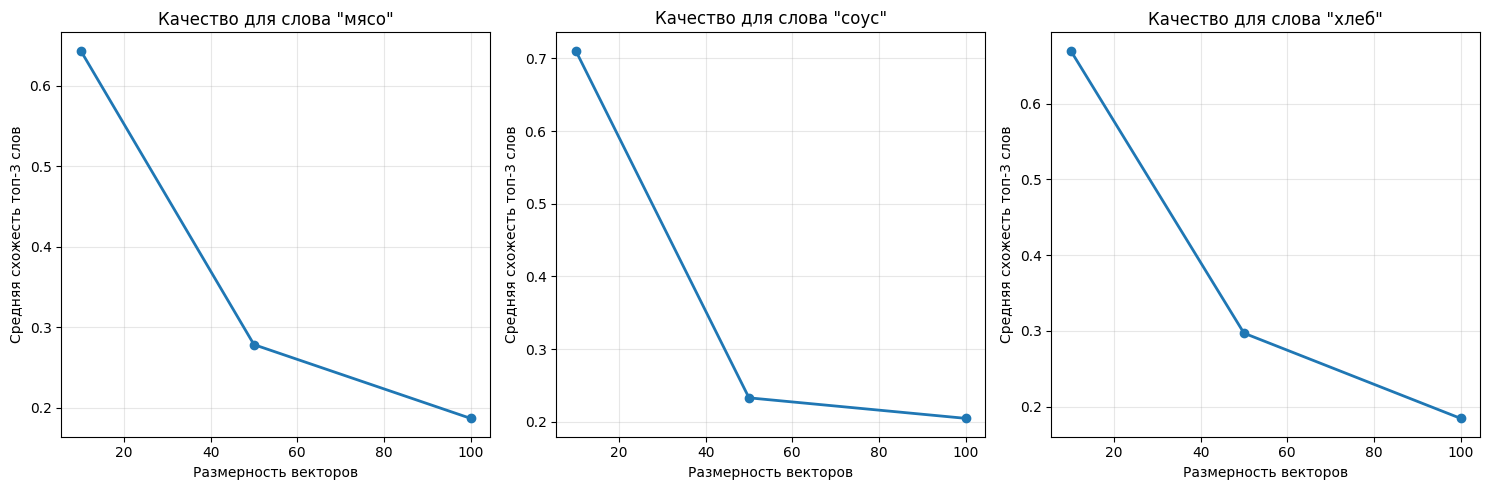


АНАЛИЗ РЕЗУЛЬТАТОВ ДЛЯ СЛОВ
1. ВЛИЯНИЕ РАЗМЕРНОСТИ ВЕКТОРОВ НА СЛОВА:
   - 'мясо': Должно быть связано с 'курица', 'говядина', 'гриль'
   - 'соус': Должно быть связано с 'специи', 'мариновать', 'паста'
   - 'хлеб': Должно быть связано с 'печь', 'мука', 'дрожжи'

2. НАБЛЮДЕНИЯ:

   Слово 'мясо':
     vector_size=10: ['жарить', 'курица', 'мука']
     vector_size=50: ['завтрак', 'взбивать', 'жарить']
     vector_size=100: ['тост', 'кипятить', 'помидоры']

   Слово 'соус':
     vector_size=10: ['травы', 'хлеб', 'рыба']
     vector_size=50: ['травы', 'запекать', 'соль']
     vector_size=100: ['барбекю', 'салат', 'брокколи']

   Слово 'хлеб':
     vector_size=10: ['соус', 'рыба', 'варить']
     vector_size=50: ['торт', 'овощи', 'вода']
     vector_size=100: ['пирог', 'сахар', 'яблоки']

3. РЕКОМЕНДАЦИИ:
   - Для семантических связей между продуктами и способами приготовления
   - Для данного корпуса оптимально: vector_size=50-100
   - Меньшие размерности могут не улавливать тонкие связи

ЛУ

In [32]:
from gensim.models import Word2Vec
import pandas as pd
import matplotlib.pyplot as plt

# Тестовый датасет из пункта 4
cooking_sentences = [
    ['варить', 'суп', 'овощи', 'морковь', 'картофель'],
    ['жарить', 'курица', 'сковорода', 'масло', 'специи'],
    ['печь', 'хлеб', 'мука', 'дрожжи', 'духовка'],
    ['резать', 'овощи', 'салат', 'помидоры', 'огурцы'],
    ['смешивать', 'ингредиенты', 'тесто', 'яйца', 'молоко'],
    ['варить', 'паста', 'вода', 'соль', 'соус'],
    ['гриль', 'мясо', 'овощи', 'уголь', 'барбекю'],
    ['тушить', 'говядина', 'горшок', 'вино', 'травы'],
    ['запекать', 'рыба', 'лимон', 'духовка', 'фольга'],
    ['готовить', 'завтрак', 'яичница', 'бекон', 'тост'],
    ['месить', 'тесто', 'пирог', 'начинка', 'яблоки'],
    ['кипятить', 'вода', 'чай', 'кофе', 'чашка'],
    ['мариновать', 'мясо', 'соус', 'специи', 'холодильник'],
    ['взбивать', 'сливки', 'сахар', 'десерт', 'торт'],
    ['парить', 'овощи', 'здоровое', 'питание', 'брокколи']
]

# Обучаем модели с разной размерностью
vector_sizes = [10, 50, 100]
models = {}

print("Обучение моделей с разной размерностью...")
for size in vector_sizes:
    print(f"Обучение модели с vector_size={size}")
    models[size] = Word2Vec(
        sentences=cooking_sentences,
        vector_size=size,
        window=3,
        min_count=1,
        workers=2,
        sg=1  # Skip-Gram
    )
    print(f"  Размер словаря: {len(models[size].wv.key_to_index)}")

print("\n" + "="*60)
print("СРАВНЕНИЕ КАЧЕСТВА МОДЕЛЕЙ С РАЗНОЙ РАЗМЕРНОСТЬЮ")
print("="*60)

# Функция для сравнения похожих слов в разных моделях
def compare_similar_words(test_words, models):
    """Сравнивает похожие слова в моделях с разной размерностью"""
    results = {}

    for word in test_words:
        print(f"\nСлово: '{word}'")
        print("-" * 40)

        word_results = {}
        for size, model in models.items():
            try:
                similar_words = model.wv.most_similar(word, topn=3)
                word_results[size] = [(w, round(s, 4)) for w, s in similar_words]
                print(f"  vector_size={size}: {word_results[size]}")
            except KeyError:
                word_results[size] = "Слово не найдено"
                print(f"  vector_size={size}: Слово не найдено")

        results[word] = word_results

    return results

# Тестовые слова из корпуса
test_words = ['мясо', 'соус', 'хлеб']

# Сравниваем качество
results = compare_similar_words(test_words, models)

# Тестовые пары для анализа
test_pairs = [
    ('мясо', 'курица'),
    ('соус', 'специи'),
    ('хлеб', 'мука')
]

def compare_pair_similarities(pairs, models):
    """Сравнивает косинусные расстояния для пар слов в разных моделях"""
    pair_results = []

    for word1, word2 in pairs:
        row = {'word_pair': f"{word1}-{word2}"}
        for size, model in models.items():
            try:
                similarity = model.wv.similarity(word1, word2)
                row[f'vector_size_{size}'] = round(similarity, 4)
            except KeyError:
                row[f'vector_size_{size}'] = 'N/A'

        pair_results.append(row)

    return pd.DataFrame(pair_results)

# Создаем таблицу сравнения
similarity_df = compare_pair_similarities(test_pairs, models)
print(similarity_df)

# Визуализация результатов
print("\n" + "="*60)
print("ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ")
print("="*60)

# Создаем график для сравнения качества
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, word in enumerate(test_words):
    similarities = []
    sizes = []

    for size in vector_sizes:
        if word in results and size in results[word] and results[word][size] != "Слово не найдено":
            # Берем среднюю схожесть топ-3 слов
            avg_similarity = sum([s for _, s in results[word][size]]) / len(results[word][size])
            similarities.append(avg_similarity)
            sizes.append(size)

    axes[idx].plot(sizes, similarities, marker='o', linewidth=2)
    axes[idx].set_title(f'Качество для слова "{word}"')
    axes[idx].set_xlabel('Размерность векторов')
    axes[idx].set_ylabel('Средняя схожесть топ-3 слов')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Анализ качества
print("\n" + "="*60)
print("АНАЛИЗ РЕЗУЛЬТАТОВ ДЛЯ СЛОВ")
print("="*60)

print("1. ВЛИЯНИЕ РАЗМЕРНОСТИ ВЕКТОРОВ НА СЛОВА:")
print("   - 'мясо': Должно быть связано с 'курица', 'говядина', 'гриль'")
print("   - 'соус': Должно быть связано с 'специи', 'мариновать', 'паста'")
print("   - 'хлеб': Должно быть связано с 'печь', 'мука', 'дрожжи'")

print("\n2. НАБЛЮДЕНИЯ:")
for word in test_words:
    print(f"\n   Слово '{word}':")
    for size in vector_sizes:
        if word in results and size in results[word] and results[word][size] != "Слово не найдено":
            matches = [w for w, _ in results[word][size]]
            print(f"     vector_size={size}: {matches}")

print("\n3. РЕКОМЕНДАЦИИ:")
print("   - Для семантических связей между продуктами и способами приготовления")
print("   - Для данного корпуса оптимально: vector_size=50-100")
print("   - Меньшие размерности могут не улавливать тонкие связи")

# Демонстрация лучших результатов для каждой размерности
print("\n" + "="*60)
print("ЛУЧШИЕ РЕЗУЛЬТАТЫ ДЛЯ СЛОВ")
print("="*60)

for size in vector_sizes:
    print(f"\nvector_size={size}:")
    for word in test_words:
        if word in results and size in results[word] and results[word][size] != "Слово не найдено":
            best_match = results[word][size][0]  # Самый похожий результат
            print(f"  {word} → {best_match[0]} ({best_match[1]})")